In [69]:
# 기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
import statsmodels.api as sm
import scipy
import pickle

# matplotlib 사용 시 한글 깨짐 문제 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

# 경고 메시지 비활성화
import warnings

warnings.filterwarnings("ignore")

# 경로 확인
path = os.getcwd()
print(path)

C:\Users\lsc\Desktop\ADP\ADP_study


In [70]:
font

'New Gulim'

## 머신러닝
### 1번 군집분석
#### 다음은 온라인 유통회사 A사의 고객의 물품 구매 정보에 대한 데이터이다. A 회사는 RMF(Recency, Monetary, Frequency) 중에서 F와 M를 기준으로 고객 군집 분석을 시행하고자 한다. 다음 물음에 답하시오.

데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [71]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany
...,...,...,...,...,...,...,...,...
41019,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,Germany
41020,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,EIRE
41021,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,France
41022,C566753,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,9/14/2011 15:48,9.95,14911.0,EIRE


In [72]:
df1.columns = [col.lower() for col in df1.columns]

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   invoiceno    41024 non-null  object 
 1   stockcode    41024 non-null  object 
 2   description  41024 non-null  object 
 3   quantity     41024 non-null  int64  
 4   invoicedate  41024 non-null  object 
 5   unitprice    41024 non-null  float64
 6   customerid   41024 non-null  float64
 7   country      41024 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


#### 1.1 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성하시오.

In [74]:
df1['totalfee'] = df1['quantity'] * df1['unitprice']

df1_grouped = df1.groupby('customerid').agg({'invoiceno' : 'size', 'totalfee' : 'sum'}).reset_index()
df1_grouped.rename({'invoiceno' : 'F', 'totalfee' : 'M'}, axis = 1, inplace = True)
df1_grouped

,customerid,F,M
0,12348.0,31,1797.24
1,12349.0,73,1757.55
2,12350.0,17,334.40
3,12352.0,95,1545.41
4,12354.0,58,1079.40
...,...,...,...
343,14935.0,10,1784.71
344,14936.0,366,8117.42
345,14937.0,35,1617.63
346,16321.0,16,230.70


#### 1.2 새로 생성된 데이터를 기준으로 EDA를 진행하고 이상치를 제거하고, 필요하다면 다른 전처리를 수행하시오.

In [75]:
# 컬럼을 데이터 타입별로 나누어보기
cat_col = df1.select_dtypes(include = 'object')
num_col = df1.select_dtypes(exclude = 'object')

In [76]:
# 1) 결측치 확인 및 처리 (전체 데이터) : 결측치 없음
display(df1.isnull().sum())

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
totalfee       0
dtype: int64

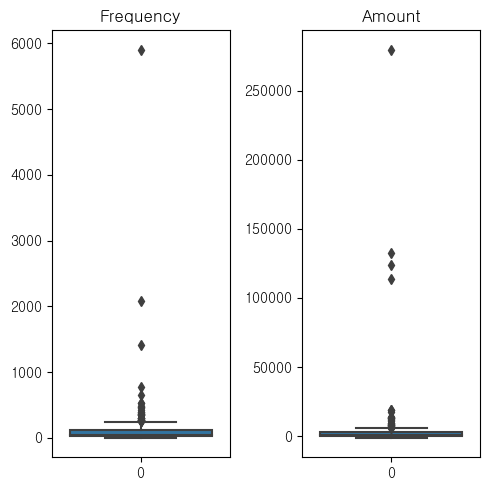

In [85]:
# 2) 새로 생성한 컬럼에 대하여 이상치 확인
fig = plt.figure(figsize = (5, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df1_grouped['F'])
plt.title('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(df1_grouped['M'])
plt.title('Amount')

plt.tight_layout()

plt.show()

In [110]:
# 이상치가 되는 데이터
f_outliers = df1_grouped[df1_grouped['F'] >= (df1_grouped['F'].quantile(0.75) * 1.5)].sort_values('F', ascending = False)
m_outliers = df1_grouped[df1_grouped['M'] >= (df1_grouped['M'].quantile(0.75) * 1.5)].sort_values('M', ascending = False)

df1_outliers = pd.merge(f_outliers, m_outliers, on = 'customerid', how = 'inner')
df1_outliers.drop(df1_outliers.columns[-2 : ], axis = 1, inplace = True)
df1_outliers.rename({'F_x' : 'F', 'M_x' : 'M'}, axis = 1, inplace = True)
df1_outliers['unit'] = df1_outliers['M'] / df1_outliers['F']

#f_outliers_data = df1[df1['customerid'].isin(f_outliers['customerid'])]
display(df1_outliers)
#display(f_outliers_data)
#display(f_outliers)

,customerid,F,M,unit
0,14911.0,5903,132572.62,22.458516
1,14646.0,2085,279489.02,134.047492
2,14156.0,1420,113384.14,79.847986
3,12415.0,778,123725.45,159.030141
4,12681.0,646,13677.59,21.172740
5,12471.0,531,18740.92,35.293635
6,12682.0,525,12288.22,23.406133
7,12540.0,481,13309.04,27.669522
8,12621.0,474,13612.07,28.717447
9,12567.0,463,9114.94,19.686695


In [104]:
sorted(df1['unitprice'].unique())

[0.0,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.19,
 0.21,
 0.22,
 0.25,
 0.29,
 0.32,
 0.34,
 0.36,
 0.37,
 0.38,
 0.39,
 0.42,
 0.53,
 0.55,
 0.59,
 0.62,
 0.63,
 0.64,
 0.65,
 0.69,
 0.72,
 0.75,
 0.77,
 0.79,
 0.82,
 0.83,
 0.85,
 0.95,
 1.0,
 1.04,
 1.05,
 1.06,
 1.08,
 1.25,
 1.45,
 1.49,
 1.55,
 1.65,
 1.69,
 1.79,
 1.85,
 1.95,
 2.08,
 2.1,
 2.25,
 2.49,
 2.55,
 2.75,
 2.89,
 2.95,
 3.0,
 3.25,
 3.29,
 3.35,
 3.39,
 3.45,
 3.75,
 3.81,
 3.95,
 4.04,
 4.15,
 4.25,
 4.5,
 4.65,
 4.95,
 5.35,
 5.39,
 5.45,
 5.55,
 5.75,
 5.95,
 6.0,
 6.25,
 6.35,
 6.45,
 6.5,
 6.65,
 6.75,
 6.95,
 7.05,
 7.08,
 7.25,
 7.45,
 7.5,
 7.65,
 7.85,
 7.9,
 7.95,
 8.15,
 8.25,
 8.49,
 8.5,
 8.95,
 9.95,
 10.39,
 10.4,
 10.65,
 10.75,
 10.95,
 11.0,
 11.15,
 11.95,
 12.5,
 12.75,
 14.95,
 15.0,
 15.95,
 16.65,
 16.95,
 17.0,
 18.0,
 18.95,
 19.95,
 20.0,
 20.8,
 21.95,
 24.95,
 25.0,
 26.33,
 27.0,
 28.0,
 29.95,
 30.0,
 34.95,
 35.0,
 35.95,
 39.95,
 40.0,
 40.46,
 41.75,
 42.5,
 42.95,
 

In [112]:
df1.drop(['invoiceno', 'description'], axis = 1, inplace = True)

In [127]:
from datetime import datetime

df1['invoicedate_2'] = df1['invoicedate'].apply(lambda x : datetime.strptime(x.split(' ')[0], '%m/%d/%Y'))
df1['invoice_month'] = df1['invoicedate_2'].dt.month

In [132]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['country'] = le.fit_transform(df1['country'])

display(df1.head())

,stockcode,quantity,invoicedate,unitprice,customerid,country,totalfee,invoicedate_2,invoice_month
0,84879,16,9/7/2011 14:13,1.69,14911.0,4,27.04,2011-09-07,9
1,22432,6,7/19/2011 9:51,1.95,12682.0,6,11.70,2011-07-19,7
2,22492,36,11/24/2011 13:17,0.65,12705.0,7,23.40,2011-11-24,11
3,22728,8,11/29/2011 11:46,3.75,12727.0,6,30.00,2011-11-29,11
4,21731,12,8/22/2011 12:40,1.65,12645.0,7,19.80,2011-08-22,8


#### 1.3 적합한 군집분석 알고리즘을 선택하고 시행한 후, 시행 결과에 대해 응집도와 분리도 관점에서 평가하시오.

#### 1.4 각 군집별 특성에 대한 의견과 비즈니스적 인사이트를 제시하시오

### 2번 시계열분석

#### 데이터 설명
- 각 raw는 관광지 A의 1990년 1월 부터 25년동안의 매달 평균 이용객 숫자이다.

In [4]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem2.csv'
encoded_url2 = urllib.parse.quote(url2, safe=':/')

response2 = urllib.request.urlopen(encoded_url2, context=context)
df2 = pd.read_csv(response2, encoding='utf-8', index_col=0)
df2

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5
...,...
295,445.2
296,472.0
297,341.6
298,477.8


#### 2-1 EDA와 시각화를 진행하라

#### 2-2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

#### 2-3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

#### 2-4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

## 통계
### 3. 기본 통계 및 확률 문제

#### 3-1 서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

In [67]:
distance = 10000

first = distance / 100
second = distance / 80

print(distance * 2 / (first + second))

88.88888888888889


#### 3-2 이전의 연매출이 3000이고 올해의 연매출이 4000, 내년의 연매출이 5000으로 늘어날 예정이라면 연평균 몇배가 증가한 것인가?

In [24]:
past = 3000
present = 4000
future = 5000

print(((future / present) / (present / past) - 1) * 100)

-6.25


#### 3-3 남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오

<img width="300" src="https://github.com/Ssunbell/Algorithm_Study/assets/97590480/98463d13-fa90-455b-a03c-a21701652dc1">

In [25]:
df3 = pd.DataFrame({'등산' : [20, 15], '수영' : [10, 30]}, index = ['남자', '여자'])
df3

,등산,수영
남자,20,10
여자,15,30


In [33]:
print(round(df3.loc['남자', '등산'] / df3.loc['남자', :].sum(), 3))

0.667


#### 3-4 표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정하라

In [3]:
n = 10
s2 = 90
std_error = np.sqrt(s2 / n)
alpha = 0.05

# 모분산의 신뢰구간
from scipy.stats import chi2

lower_limit = ((n - 1) * s2) / scipy.stats.chi2.ppf(alpha / 2, n - 1)
upper_limit = ((n - 1) * s2) / scipy.stats.chi2.ppf(1 - alpha / 2, n - 1)

print([lower_limit, upper_limit])

[299.95672846672363, 42.58055444790953]


### 4번 임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%이고 혈압약 투약 이전과 이후의 차이가 존재하는지 확인하려한다.

#### 4-1 귀무가설과 연구가설을 제시하시오

H_0 : 혈압약 투약 여부에 따른 차이가 존재하지 않는다.  
H_1 : 혈압약 투약 여부에 따른 차이가 존재한다.

#### 4-2 검정 후 귀무가설 기각 여부 제시

In [7]:
# 모분산을 모르므로 T분포 사용
n = 20
alpha = 0.05
sample_mean = 24
mu = 0
std_error = 9 / np.sqrt(n)

from scipy.stats import t

statistics = (sample_mean - mu) / std_error

if statistics >= t.ppf(1 - alpha / 2, df = n - 1) : 
    print('귀무가설 기각 : 투약 여부에 따른 차이가 존재한다는 주장은 통계적으로 유의하다.')
else : 
    print('귀무가설 기각 불가 : 투약 여부에 따른 차이가 존재한다고 보기 어렵다.')

귀무가설 기각 : 투약 여부에 따른 차이가 존재한다는 주장은 통계적으로 유의하다.


### 5번 공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

In [17]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem5.csv'
encoded_url3 = urllib.parse.quote(url3, safe=':/')

response3 = urllib.request.urlopen(encoded_url3, context=context)
df3 = pd.read_csv(response3, encoding='utf-8')
df3

,출하 소요시간,공장,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1
5,64,Z,6
6,58,Y,2
7,71,Z,12
8,76,Y,14
9,67,Y,8


In [18]:
df3.columns = [col.strip() for col in df3.columns]

#### 5-1. 연구가설과 귀무가설을 설정하시오

H_0 : 세 공장 X, Y, Z의 평균 출하 시간의 중위수 차이가 없다.  
H_1 : 세 공장 X, Y, Z 중 적어도 한 개 이상의 공장의 평균 출하 시간의 중위수 차이가 존재한다.

#### 5-2. 검정통계량을 구하고 가설을 채택하시오

In [19]:
# 비모수검정
display(df3.groupby('공장').agg('size'))

공장
X    15
Y    15
Z    14
dtype: int64

In [32]:
# Kruskal-Wallis : 세 개 이상의 집단에 대한 동질성 검정
df3_x = df3.groupby('공장').get_group('X').sort_values('출하 소요시간').reset_index(drop = True)
df3_y = df3.groupby('공장').get_group('Y').sort_values('출하 소요시간').reset_index(drop = True)
df3_z = df3.groupby('공장').get_group('Z').sort_values('출하 소요시간').reset_index(drop = True)

alpha = 0.05

from scipy.stats import kruskal

result = kruskal(df3_x['출하 소요시간'], df3_y['출하 소요시간'], df3_z['출하 소요시간'])
display(result)

if result[1] < alpha :
    print('귀무가설 기각 : 공장 간 중위수 차이가 존재한다고 볼 수 있다.')
else : 
    print('귀무가설 기각 불가 : 공장 간 중위수 차이가 존재한다고 볼 수 없다.')

KruskalResult(statistic=0.7217886080379153, pvalue=0.6970526702392181)

귀무가설 기각 불가 : 공장 간 중위수 차이가 존재한다고 볼 수 없다.


### 6번 다음은 A사의 투자 방안에 대한 표이다. 3년동안의 1~5안의 투자금액을 참고하여 1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오.

<img width="300" src="https://github.com/Ssunbell/Algorithm_Study/assets/97590480/33f192c2-1103-4f88-ae36-f1ed0fbb9e18">

In [65]:
df4 = pd.DataFrame({'1개년' : [10, 15, 12, 13, 16]
                   , '2개년' : [20, 14, 11, 25, 30]
                   , '3개년' : [15, 19, 30, 20, 24]}, index = [f'{i + 1}안' for i in range(5)])
df4 

,1개년,2개년,3개년
1안,10,20,15
2안,15,14,19
3안,12,11,30
4안,13,25,20
5안,16,30,24


In [66]:
# 이자율은 임의로 설정하였음. 각각 투자수익률(Coupon Rate), 시장이자율.
er_invest = 0.05
ir_saving = 0.01

my_budget = [50, 60, 70]

def get_npv(budget, invest) :
    npv_invest = 0
    npv_saving = 0
    npv_cost = np.sum(invest)
    
    for bud, inv in zip(budget, list(invest)) :
        npv_invest += inv * er_invest / (1 + ir_saving) ** (i + 1)
        npv_saving += (bud - inv) / (1 + ir_saving) ** (i + 1)
   
    return npv_invest + npv_saving - npv_cost

df4['NPV'] = df4.apply(lambda x : get_npv(my_budget, x), axis = 1)

print(df4['NPV'].idxmax())

1안
